# RETO: *Ingeniería de características*

+ El objetivo de este reto es extraer o diseñar un mejor par de características para construir un clasificador linear mediante regresión logística.
+ Ejecuta todo el cuaderno y después lee las instrucciones del reto, abajo del todo.
---
    [ES] Código de Alfredo Cuesta Infante para 'Reconocimiento de Patrones'
       @ Master Universitario en Visión Artificial, 2020, URJC (España)
    [EN] Code by Alfredo Cuesta-Infante for 'Pattern Recognition'
       @ Master of Computer Vision, 2020, URJC (Spain)

    alfredo.cuesta@urjc.es

In [ ]:
# PONED VUESTROS NOMBRES EN ESTA LISTA 
nombres = ['Javier Albaráñez Martínez']

In [21]:
import numpy  as np
import pandas as pd
from matplotlib import pyplot as plt

In [50]:
#-------------------------------#
# Extracción de características #
#-------------------------------#
def feat_extraction (data, theta=0.1):
    # data: dataframe
    # theta: parameter of the feature extraction
    # features extracted: 
    #   'width','W_max1','W_max2','W_max3',
    #   'height','H_max1','H_max2','H_max3',
    #   'area','w_vs_h'
    #
    features = np.zeros([data.shape[0], 12]) #<- allocate memory with zeros
    data = data.values.reshape([data.shape[0],28,28]) 
    #-> axis 0: id of instance, axis 1: width(cols) , axis 2: height(rows)
    for k in range(data.shape[0]):
        #..current image 
        x = data[k,:,:]
        #--width feature
        sum_cols = x.sum(axis=0) #<- axis0 of x, not of data!!
        indc = np.argwhere(sum_cols > theta * sum_cols.max())
        col_3maxs = np.argsort(sum_cols)[-3:] 
        features[k,0] = indc[-1] - indc[0]
        features[k,1:4] = col_3maxs
        #meanWMAX
        features[k,10] = np.sum(col_3maxs)/3
        #--tint
        features[:,11] = x.sum()
        #--height feature
        sum_rows = x.sum(axis=1) #<- axis1 of x, not of data!!
        indr = np.argwhere(sum_rows > theta * sum_rows.max())
        features[k,4] = indr[-1] - indr[0]
        row_3maxs = np.argsort(sum_rows)[-3:] 
        features[k,5:8] = row_3maxs
    #--area
    features[:,8] = features[:,0] * features[:,4]
    #--ratio W/H
    features[:,9] = features[:,0] / features[:,4]

    #features[:,10] = (features[:,1] > features[:,0])*1 + (features[:,2] > features[:,0])*1 + (features[:,3] > features[:,0])*1
    #features[:,10] =  np.sum(features[:,1:3] > [np.concatenate([features[:,0],features[:,0],features[:,0]], axis=1)
    #print(np.count_nonzero(features[:,1:4] > theta, axis=1))
    #print(features[:,10])
    col_names = ['width','W_max1','W_max2','W_max3','height','H_max1','H_max2','H_max3','area','w_vs_h','meanWMAX','tint']
    features = (features - features.min()) / (features.max() - features.min())
    return pd.DataFrame(features,columns = col_names) 

In [23]:
#---------------------#
# Separacion de datos #
#---------------------#
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    train_set = data.iloc[train_indices]
    test_set  = data.iloc[test_indices]
    return train_set.reset_index(drop=True), test_set.reset_index(drop=True)

In [24]:
#------------------------------#
# Algunas funciones auxiliares #
#------------------------------#

def join_features_labels(X0,X1):
    Y0 = pd.DataFrame(np.zeros(X0.shape[0]),columns=['label'])
    XY0 = pd.concat([X0,Y0],axis=1)
    Y1 = pd.DataFrame(np.ones(X1.shape[0]),columns=['label'])
    XY1 = pd.concat([X1,Y1],axis=1)
    return pd.concat([XY0,XY1],axis=0,ignore_index=True)

def jitter(X,sigma=0.2):
    random_sign = (-1)**np.random.randint(1,3,*X.shape)
    return X + np.random.normal(0,sigma,*X.shape)*random_sign

In [53]:
#------------------------------#
# Construcción de los datasets #
#------------------------------#
np.random.seed(seed=1234) #<- comment this to get randomness
fraction_Test  = 0.2
fraction_Valid = 0.2
theta = 0.0

# --- Get data -------------------------------------
FullSet_0 = pd.read_csv('../../Datasets/1000ceros.csv', header=None)
FullSet_1 = pd.read_csv('../../Datasets/1000unos.csv',  header=None)
FullSet_0 = FullSet_0 /255. #<- quick rescale to [0,1]
FullSet_1 = FullSet_1 /255. #<- quick rescale to [0,1]

# --- Separate Test sets -----------------------------
TrainSet_0, TestSet_0 = split_train_test(FullSet_0, fraction_Test)
TrainSet_1, TestSet_1 = split_train_test(FullSet_1, fraction_Test)

# --- Separate Validation sets -----------------------
TrainSet_0, ValidSet_0 = split_train_test(TrainSet_0, fraction_Valid)
TrainSet_1, ValidSet_1 = split_train_test(TrainSet_1, fraction_Valid)

# --- Ensamble TRAIN SET, VALIDATION SET Y TEST SET --
#          with the features and the labels
Feat_train = join_features_labels(feat_extraction(TrainSet_0, theta=theta), 
                                  feat_extraction(TrainSet_1, theta=theta))
Feat_valid = join_features_labels(feat_extraction(ValidSet_0, theta=theta),
                                  feat_extraction(ValidSet_1, theta=theta))
Feat_test  = join_features_labels(feat_extraction(TestSet_0,  theta=theta),
                                  feat_extraction(TestSet_1,  theta=theta))

['Javier Albaráñez Martínez'] 

Outcome:
  :) HIT  = 320, (100.00%)
  :( FAIL = 0, (0.00%)

Logistic regression model:
  clf coef. =  [[-1.52008678e+01 -1.07367192e-02]]
  clf intercept =  [4.30814307]


TypeError: 'numpy.int64' object is not callable

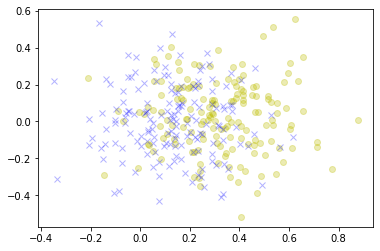

In [55]:
#----------------------------#
# Entrenamiento y evaluación #
#----------------------------#

#-[1].Select any 2 features from the list:
#    -features list: 'width','W_max1','W_max2','W_max3','height','H_max1','H_max2','H_max3','area','w_vs_h'
feat_1 = 'tint'
feat_2 = 'w_vs_h'

#-[2].Fit a LogisticRegression model (a linear classifier) with Feat_train dataframe
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(Feat_train[[feat_1, feat_2]], Feat_train['label'])

#-[3].Predict the Feat_valid dataframe
y_pred = clf.predict( Feat_valid[[feat_1, feat_2]] )

#-[4].Compare the predictions with the ground truth
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_pred, Feat_valid['label'])
N_success = conf_mat[0,0]+conf_mat[1,1]
N_fails = conf_mat[0,1]+conf_mat[1,0]
print (nombres,"\n")
print("Outcome:")
strlog = "  :) HIT  = %d, (%0.2f%%)"%(N_success, 100*N_success/(N_success+N_fails))
print(strlog)
strlog = "  :( FAIL = %d, (%0.2f%%)"%(N_fails, 100*N_fails/(N_success+N_fails))
print(strlog)

#-[5].Show the (linear) model parameters
print("\nLogistic regression model:")
print("  clf coef. = ",clf.coef_)
print("  clf intercept = ",clf.intercept_)

#-[6].Plot Feat_valid and the model
ind = Feat_valid['label']==0
x0, x1 = Feat_valid[ind][feat_1], Feat_valid[~ind][feat_1]
y0, y1 = Feat_valid[ind][feat_2], Feat_valid[~ind][feat_2]
plt.plot(jitter(x0),jitter(y0),'yo',jitter(x1),jitter(y1),'bx', alpha=.3)

w = clf.coef_[0]
a = -w[0] / w[1]
xmin=min(x0.min(axis=0),x1.min(axis=0))
xmax=max(x0.max(axis=0),x1.max(axis=0))
ymin=min(y0.min(axis=0),y1.min(axis=0))
ymax=max(y0.max(axis=0),y1.max(axis=0))
xx = np.linspace(xmin,xmax)
yy = a * xx - (clf.intercept_[0] / w[1])
plt.plot(xx,yy,'r')
strTitle = "w_X = %2.2f, w_Y = %2.2f, w_0 = %2.2f " % (w[0], w[1], clf.intercept_[0])
plt.axis([xmin-1,xmax+1,ymin-1,ymax+1])
plt.title(strTitle)
plt.xlabel(feat_1)
plt.ylabel(feat_2)
plt.show()

In [51]:
def extractor(theta):
    np.random.seed(seed=1234) #<- comment this to get randomness
    fraction_Test  = 0.2
    fraction_Valid = 0.2

    # --- Get data -------------------------------------
    FullSet_0 = pd.read_csv('../../Datasets/1000ceros.csv', header=None)
    FullSet_1 = pd.read_csv('../../Datasets/1000unos.csv',  header=None)
    FullSet_0 = FullSet_0 /255. #<- quick rescale to [0,1]
    FullSet_1 = FullSet_1 /255. #<- quick rescale to [0,1]

    # --- Separate Test sets -----------------------------
    TrainSet_0, TestSet_0 = split_train_test(FullSet_0, fraction_Test)
    TrainSet_1, TestSet_1 = split_train_test(FullSet_1, fraction_Test)

    # --- Separate Validation sets -----------------------
    TrainSet_0, ValidSet_0 = split_train_test(TrainSet_0, fraction_Valid)
    TrainSet_1, ValidSet_1 = split_train_test(TrainSet_1, fraction_Valid)

    # --- Ensamble TRAIN SET, VALIDATION SET Y TEST SET --
    #          with the features and the labels
    Feat_train = join_features_labels(feat_extraction(TrainSet_0, theta=theta),
                                      feat_extraction(TrainSet_1, theta=theta))
    Feat_valid = join_features_labels(feat_extraction(ValidSet_0, theta=theta),
                                      feat_extraction(ValidSet_1, theta=theta))
    Feat_test  = join_features_labels(feat_extraction(TestSet_0,  theta=theta),
                                      feat_extraction(TestSet_1,  theta=theta))
    feat_1 = 'tint'
    feat_2 = 'width'

    #-[2].Fit a LogisticRegression model (a linear classifier) with Feat_train dataframe
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression()
    clf.fit(Feat_train[[feat_1, feat_2]], Feat_train['label'])

    #-[3].Predict the Feat_valid dataframe
    y_pred = clf.predict( Feat_valid[[feat_1, feat_2]] )

    #-[4].Compare the predictions with the ground truth
    from sklearn.metrics import confusion_matrix
    conf_mat = confusion_matrix(y_pred, Feat_valid['label'])
    return conf_mat[0,0]+conf_mat[1,1]

In [52]:
max = 0
best = 0
for i in range(0,100):
    try :
        hits = extractor(i/100)
        if hits > max:
            max = hits
            best = i/100
    except ValueError:
        print(f'Fallo en {i}')
print(f'{best} consiguió {max}')

C:\Users\TTe_J\.conda\envs\myRP\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\TTe_J\.conda\envs\myRP\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide
C:\Users\TTe_J\.conda\envs\myRP\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\TTe_J\.conda\envs\myRP\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide
C:\Users\TTe_J\.conda\envs\myRP\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\TTe_J\.conda\envs\myRP\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide
C:\Users\TTe_J\.conda\envs\myRP\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\TTe_J\.conda\envs\myRP\lib\site-packages\ipykernel_launc

Fallo en 71
Fallo en 72
Fallo en 73
Fallo en 74
Fallo en 75
Fallo en 76
Fallo en 77
Fallo en 78
Fallo en 79
Fallo en 80
Fallo en 81
Fallo en 82
Fallo en 83
Fallo en 84
Fallo en 85
Fallo en 86
Fallo en 87
Fallo en 88
Fallo en 89
Fallo en 90
Fallo en 91
Fallo en 92
Fallo en 93
Fallo en 94
Fallo en 95
Fallo en 96
Fallo en 97
Fallo en 98
Fallo en 99
0.0 consiguió 320


Este reto consiste en extraer o diseñar dos características que mejor separen linealmente los ceros de los unos. 
Para ello:
+ Podeis modificar la funcion **feat_extraction** y el parámetro **theta**
+ NO podeis modificar el método de aprendizaje
+ NO podeis utilizar más de dos características para aprender el modelo.
+ NO podeis modificar la semilla de números pseudoaleatorios (seed=1234)

Una vez lo hayais hecho, debeis ejecutar todo el cuaderno (*Kernel $\rightarrow$ Restart & Run all* ) para obtener el resultado en la celda de arriba.

Por último, teneis que:
1. Descargar el cuaderno ( *File* $\rightarrow$ *Download as* $\rightarrow$ *Notebook* )<br>
Hacer esto con el cuaderno **tal y como haya quedado al terminar la ejecución**
2. Subirlo al aula virtual, en la pestaña *Evaluación*, en la tarea *Reto 1: Ingeniería de características*